c:\Users
c:\
0 train acc, test acc | 0.0993, 0.1032
600 train acc, test acc | 0.8436, 0.8471
1200 train acc, test acc | 0.8871166666666667, 0.8927
1800 train acc, test acc | 0.8984666666666666, 0.9013
2400 train acc, test acc | 0.9057166666666666, 0.9094
3000 train acc, test acc | 0.9104, 0.9142
3600 train acc, test acc | 0.9149166666666667, 0.9179
4200 train acc, test acc | 0.917, 0.921
4800 train acc, test acc | 0.9204, 0.921
5400 train acc, test acc | 0.92275, 0.9245
6000 train acc, test acc | 0.9245833333333333, 0.9251
6600 train acc, test acc | 0.9266166666666666, 0.9249
7200 train acc, test acc | 0.9296666666666666, 0.9291
7800 train acc, test acc | 0.9320833333333334, 0.9318
8400 train acc, test acc | 0.9330166666666667, 0.9331
9000 train acc, test acc | 0.9363333333333334, 0.9352
9600 train acc, test acc | 0.9383, 0.9377
10200 train acc, test acc | 0.93965, 0.9384
10800 train acc, test acc | 0.9422, 0.9419
11400 train acc, test acc | 0.9430166666666666, 0.942
12000 train acc, t

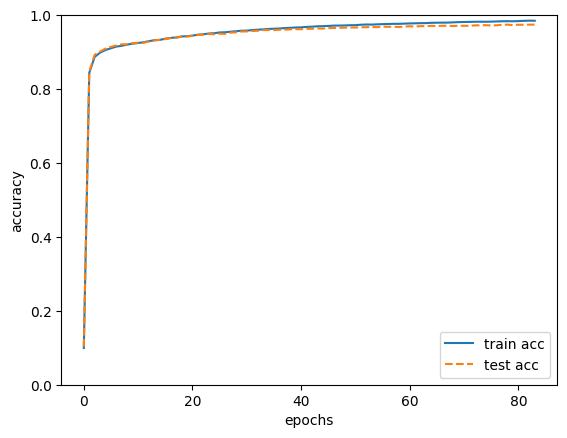

In [11]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#(질문) 둘다 왜 True?

network = TwoLayerNet(input_size=784, hidden_size=300, output_size=10)
#input 784, hidden 50, output 10구성의 신경망
#입력값 갯수, 은닉층이 50? 최종출력층값 갯수 10


# 하이퍼파라미터
iters_num = 50000
train_size = x_train.shape[0]
#x.shape[0]  코드는 입력 데이터 배열 x에 포함된 데이터 샘플의 개수(배치 크기)를 얻기 위해 사용
# x가 100개의 이미지와 각 784개의 픽셀을 가진다면, x.shape는 (100, 784)이고, x.shape[0]은 100
# 이 값은 정확도를 계산하거나 , 역전파 시 오차를 정규화할 때  사용됩니다

batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
#에폭 epoch 은 전체 데이터 세트의 순전역전을 한번 완료한 횟수. 여러번 에폭 수행해야 경사하강법의 효과가 생김
#에폭이 너무 크면 overfitting / 너무 작으면 underfitting
#에폭을 나누어서 미니배칫만흠 실행하면 iteration = mini batch 수

iter_per_epoch = max(train_size / batch_size, 1)
#에폭당 반복? 미니배치 수인거지? 전체 train 갯수 나누기 batch 크기.

#그래서 미니배치 수를 어케 얻을건데? 그건 아래 for 문에서~

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]  #랜덤으로 선택하게 됨
    t_batch = t_train[batch_mask]
    
    # 기울기 계산 (역전파 방식으로 하는 것이 시간이 덜 걸린다~)
    grad = network.gradient(x_batch, t_batch)
    ##grad = network.nemerical_gradient(x_batch, t_batch)
        
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
